In [1]:
import pandas as pd

import numpy as np
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
path = untar_data(URLs.FOOD)

In [4]:
len((path/'images/').ls())

104

In [5]:
df_train=pd.read_json(path/"train.json")
train_list=pd.DataFrame(df_train.values.flatten())
train_list["is_valid"]=False
train_list["label"]=train_list.iloc[:,0].str.split('/',expand=True)[0]
train_list.columns.values[0]="fname"


In [6]:
df_test=pd.read_json(path/"test.json")
test_list=pd.DataFrame(df_test.values.flatten())
test_list["is_valid"]=True
test_list["label"]=test_list.iloc[:,0].str.split('/',expand=True)[0]
test_list.columns.values[0]="fname"


In [7]:
train_list.head()

fname  is_valid              label
0            churros/1004234     False            churros
1  hot_and_sour_soup/1002782     False  hot_and_sour_soup
2             samosa/1008131     False             samosa
3            sashimi/1001239     False            sashimi
4          pork_chop/1000802     False          pork_chop

In [8]:
test_list.head()

fname  is_valid              label
0            churros/1061830      True            churros
1  hot_and_sour_soup/1000486      True  hot_and_sour_soup
2             samosa/1009326      True             samosa
3             sashimi/100113      True            sashimi
4          pork_chop/1012227      True          pork_chop

In [9]:
split_list=train_list.append(test_list)

In [10]:
src=(ImageList.from_df(split_list,path/'images',suffix='.jpg')
     .split_from_df(1)
     .label_from_df(cols="label"))

In [11]:
ds_tfms = ([RandTransform(tfm=TfmAffine (flip_affine), kwargs={}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmCoord (symmetric_warp), kwargs={'magnitude': (-0.2, 0.2)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (rotate), kwargs={'degrees': (-40.0, 40.0)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmAffine (zoom), kwargs={'scale': (1.0, 1.4), 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmLighting (brightness), kwargs={'change': (0.34, 0.65)}, p=0.75, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmLighting (contrast), kwargs={'scale': (0.7, 1.43)}, p=0.75, resolved={}, do_run=True, is_random=True),
            RandTransform(tfm=TfmAffine (squish), kwargs={'scale':(.42,2.4)}, p=0.5, resolved={}, do_run=True, is_random=True), 
            RandTransform(tfm=TfmCoord (jitter), kwargs={'magnitude':(-0.001,0.01)}, p=0.5, resolved={}, do_run=True, is_random=True),
            RandTransform(tfm=TfmCoord (skew), kwargs={'direction': (0.0, 7), 'magnitude':(0.2)}, p=0.5, resolved={}, do_run=True, is_random=True)],
           [])

In [12]:
def get_data(size, bs):
    return (src
           .transform(ds_tfms, size=size)
           .databunch(bs=bs).normalize(imagenet_stats))

In [18]:
data = get_data(224, bs=256)

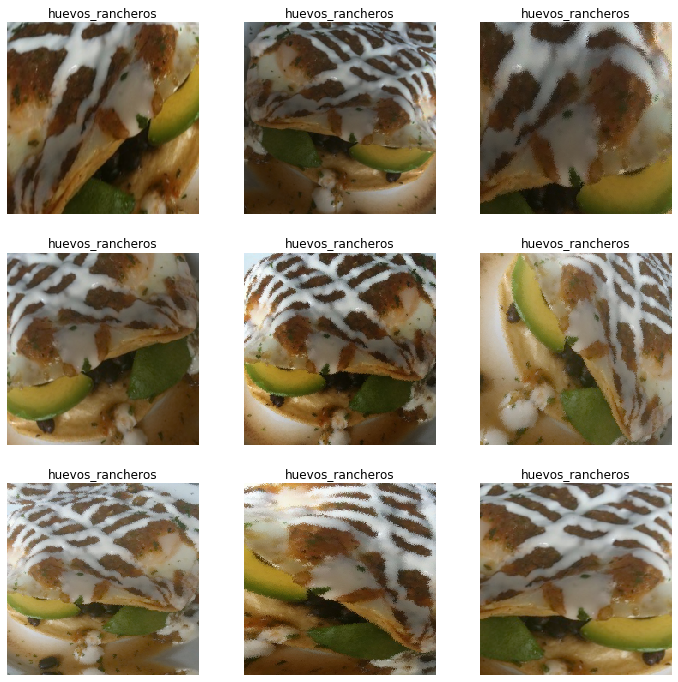

In [14]:
def _plot(i,j,ax):
    x,y = data.train_ds[89]
    x.show(ax, y=y)

plot_multi(_plot, 3, 3, figsize=(12,12))

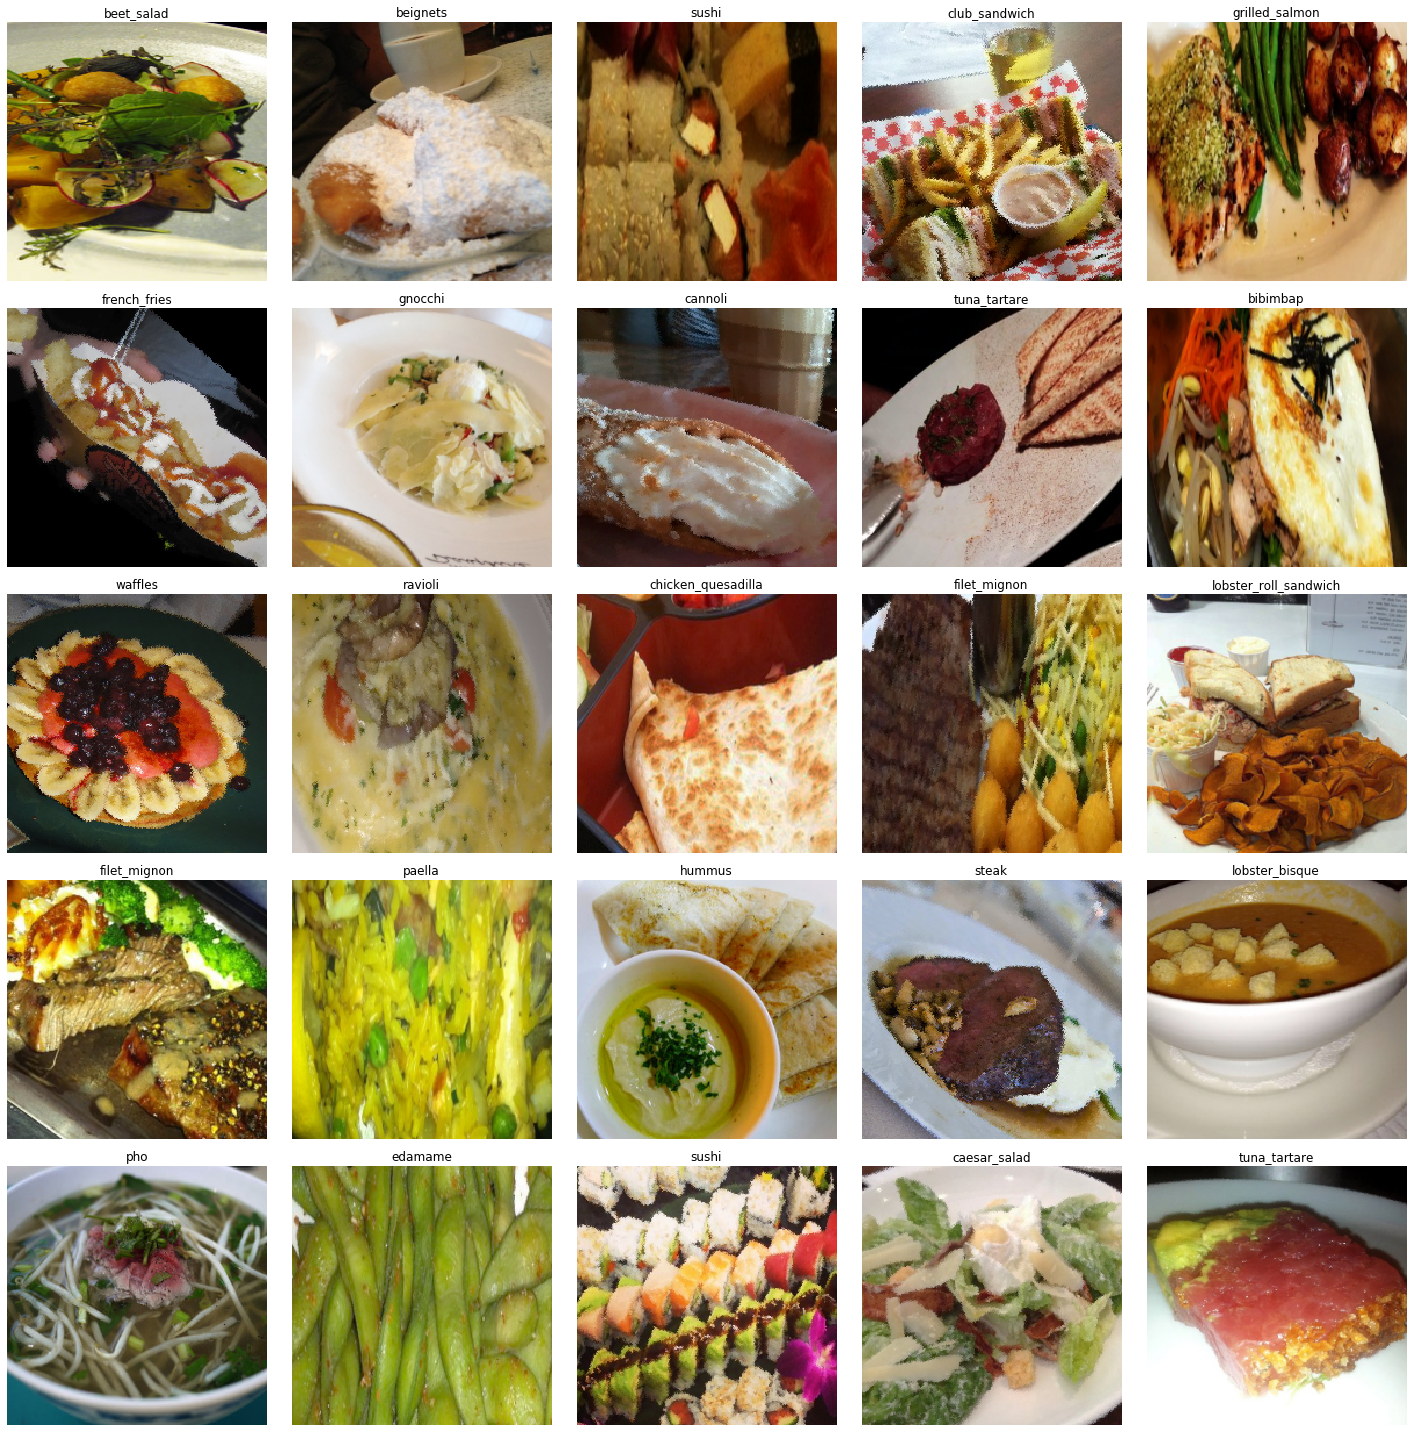

In [15]:
data.show_batch()

In [19]:
learn = cnn_learner(data, models.resnet50,
                    metrics=[accuracy, top_k_accuracy], callback_fns=ShowGraph)




In [19]:
learn.load('food-101-ResNet50-2-stage1')

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias

In [20]:
learn.to_fp16()

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


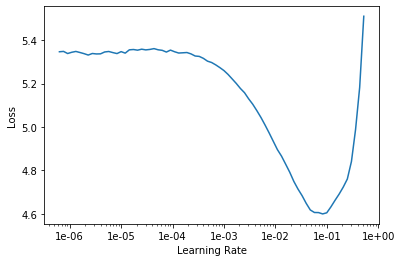

In [23]:

data = get_data(224, bs=128)
learn.data=data
learn.to_fp16()
learn.lr_find()
learn.recorder.plot()


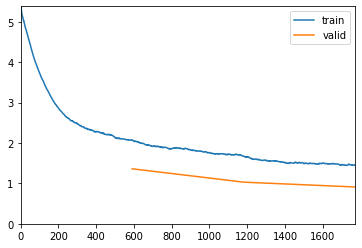

In [27]:
lr=1e-02
learn.fit_one_cycle(3,slice(lr))

In [35]:
learn.save('food-101-ResNet50-2-stage1')



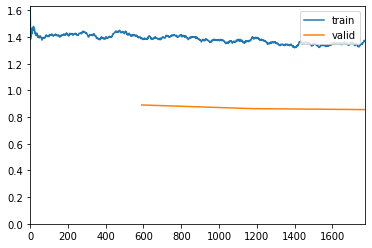

In [28]:
lr=1e-02/10
learn.fit_one_cycle(3,slice(lr))

In [29]:
learn.save('food-101-ResNet50-2-stage2')



In [30]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


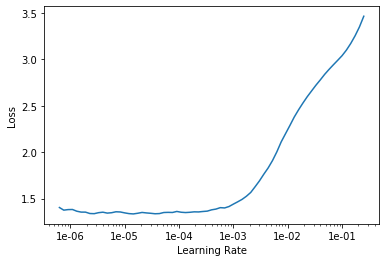

In [31]:
learn.lr_find()
learn.recorder.plot()

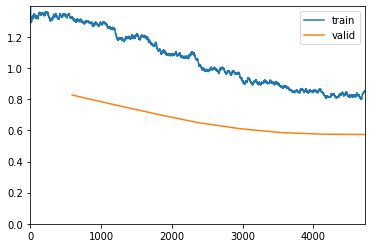

In [38]:

learn.fit_one_cycle(8,slice(1e-06,1e-03))

In [39]:
learn.save('food-101-ResNet50-2-stage3')



In [13]:
data = get_data(512, bs=32)


In [14]:
learn = cnn_learner(data, models.resnet50,
                    metrics=[accuracy, top_k_accuracy], callback_fns=ShowGraph).to_fp16()



In [15]:
learn.load('food-101-ResNet50-2-stage3')

learn.freeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


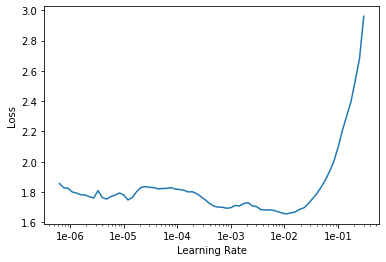

In [16]:
learn.lr_find()
learn.recorder.plot()

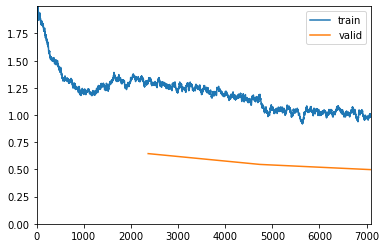

In [17]:
lr=1e-02/2
learn.fit_one_cycle(3,slice(lr))

In [18]:
learn.save('food-101-ResNet50-2-stage4')



In [15]:
learn.load('food-101-ResNet50-2-stage4')



Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias

In [16]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


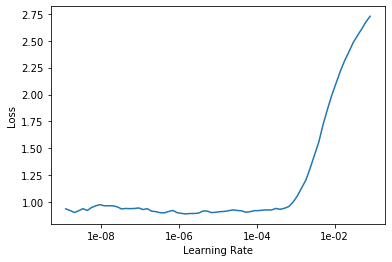

In [18]:
learn.lr_find(start_lr=1e-10)
learn.recorder.plot()

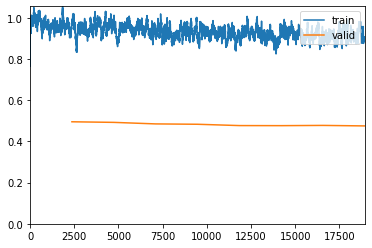

In [19]:
learn.fit_one_cycle(8, max_lr=slice(1e-07,1e-05))

In [20]:
learn.save('food-101-ResNet50-2-stage5_final')



In [22]:
learn.to_fp32()

Learner(data=ImageDataBunch;

Train: LabelList (75750 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Valid: LabelList (25250 items)
x: ImageList
Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512),Image (3, 512, 512)
y: CategoryList
churros,hot_and_sour_soup,samosa,sashimi,pork_chop
Path: /home/jupyter/.fastai/data/food-101/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias

In [23]:
accuracy(*learn.TTA())


tensor(0.8708)